In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [0]:
lr = 0.01
epochs = 1000
disp = 50

In [0]:
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [0]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [0]:
pred = tf.add(tf.multiply(X,W), B)

In [7]:
cost = tf.reduce_sum(tf.pow(Y-pred, 2)) / (2 * n_samples)
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
init = tf.global_variables_initializer()

49 C =  0.27816465 W =  0.50264776 B =  -1.0036734
49 C =  0.27787635 W =  0.50666475 B =  -1.0027605
49 C =  0.27793148 W =  0.5076551 B =  -1.0025805
49 C =  0.27841923 W =  0.51075834 B =  -1.002118
49 C =  0.27790204 W =  0.5073201 B =  -1.0026141
49 C =  0.27799016 W =  0.5084506 B =  -1.0023429
49 C =  0.27780506 W =  0.5049774 B =  -1.0026981
49 C =  0.27780688 W =  0.5067117 B =  -1.0024176
49 C =  0.2777852 W =  0.5053119 B =  -1.002602
49 C =  0.27770823 W =  0.5067505 B =  -1.0019381
49 C =  0.2777892 W =  0.5078292 B =  -1.0017849
49 C =  0.2780216 W =  0.5013977 B =  -1.002381
49 C =  0.27802902 W =  0.50136167 B =  -1.0023878
49 C =  0.27812734 W =  0.50087714 B =  -1.0024483
49 C =  0.2777713 W =  0.50284106 B =  -1.002101
49 C =  0.27859032 W =  0.4989191 B =  -1.002524
49 C =  0.2781478 W =  0.5002975 B =  -1.0020794
99 C =  0.2549155 W =  0.48760617 B =  -0.8963108
99 C =  0.25464764 W =  0.4915166 B =  -0.8954221
99 C =  0.25469705 W =  0.4924292 B =  -0.89525616
99 

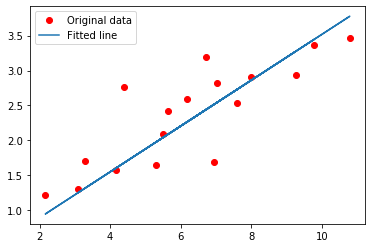

In [14]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict= {X:x, Y:y})

            if (epoch+1) % disp == 0:
                c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
                print(epoch, 'C = ',c, 'W = ', sess.run(W), 'B = ', sess.run(B))
    
    c = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
    print('Final C = ',c, 'W = ', sess.run(W), 'B = ', sess.run(B))    

    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(B), label='Fitted line')

    plt.legend()
    plt.show()